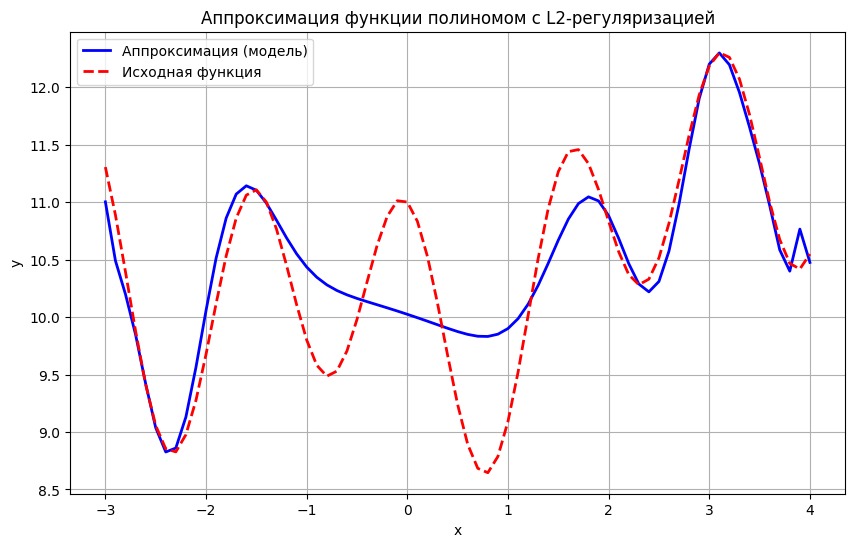

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Определяем исходную функцию
# -----------------------------
def func(x):
    # исходная функция, которую будем аппроксимировать
    return 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + np.cos(4*x) + 10


# -----------------------------
# 2) Формируем выборку точек
# -----------------------------
x = np.arange(-3.0, 4.1, 0.1)   # значения по оси Ox (от -3 до 4 с шагом 0.1)
y = np.array(func(x))           # вычисляем значения функции в этих точках

N = 22   # размер признакового пространства (полином степени 21)
lm = 20  # коэффициент λ для L2-регуляризации (ridge)

# -----------------------------
# 3) Формируем матрицу признаков X
# -----------------------------
# каждая строка X — это [1, x, x^2, ..., x^(N-1)]
X = np.array([[a ** n for n in range(N)] for a in x])

# матрица λI для регуляризации
IL = lm * np.eye(N)
IL[0][0] = 0    # первый коэффициент w0 не регуляризуем

# -----------------------------
# 4) Формируем обучающую выборку
# -----------------------------
# берём через одну точку, чтобы обучать не на всех данных
X_train = X[::2]   # входные данные
Y_train = y[::2]   # целевые значения

# -----------------------------
# 5) Вычисляем оптимальные веса w*
# -----------------------------
# по формуле: w* = (X^T X + λI)^(-1) X^T Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = A @ X_train.T @ Y_train

# -----------------------------
# 6) Строим предсказания модели
# -----------------------------
# для всех точек на сетке x
y_pred = X @ w

# -----------------------------
# 7) Вычисляем среднюю ошибку Q
# -----------------------------
# Q = среднее квадратичное отклонение предсказаний от реальных значений
w = tuple(w)   # сохраняем веса в виде кортежа
Q = np.mean((y_pred - y) ** 2)

# -----------------------------
# 8) Визуализация
# -----------------------------
# yy — это предсказания модели (эквивалентно y_pred)
# yy = [np.dot(w, xi) for xi in X]

# plt.plot(x, yy, label="Аппроксимация (модель)")
# plt.plot(x, y, label="Исходная функция")
# plt.grid(True)
# plt.legend()
# plt.show()
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label="Аппроксимация (модель)", color='blue', linewidth=2)
plt.plot(x, y, label="Исходная функция", color='red', linestyle='--', linewidth=2)
plt.title("Аппроксимация функции полиномом с L2-регуляризацией")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()
